In [1]:
import pandas as pd

In [2]:
sales = pd.read_pickle('../datasets/walmart_sales.pkl')

In [3]:
sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
2,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
3,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
4,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


In [4]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(['store', 'type'])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(['store', 'department'])
print(store_depts.head())

# Subset the rows that are holiday weeks and drop duplicate dates
holiday_dates = sales[sales['is_holiday']].drop_duplicates('date')

# Print date col of holiday_dates
print(holiday_dates['date'])

       store type  department       date  weekly_sales  is_holiday  \
0          1    A           1 2010-02-05      24924.50       False   
10244      2    A           1 2010-02-05      35034.06       False   
20482      3    B           1 2010-02-05       6453.58       False   
29518      4    A           1 2010-02-05      38724.42       False   
39790      5    B           1 2010-02-05       9323.89       False   

       temperature_c  fuel_price_usd_per_l  unemployment  
0           5.727778              0.679451         8.106  
10244       4.550000              0.679451         8.324  
20482       7.616667              0.679451         7.368  
29518       6.533333              0.686319         8.623  
39790       4.277778              0.679451         6.566  
   store type  department       date  weekly_sales  is_holiday  temperature_c  \
0      1    A           1 2010-02-05      24924.50       False       5.727778   
1      1    A           2 2010-02-05      50605.27       False 

In [5]:
# Count the number of stores of each type
store_counts = store_types["type"].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

A    22
B    17
C     6
Name: type, dtype: int64
A    0.488889
B    0.377778
C    0.133333
Name: type, dtype: float64
1     45
9     45
4     45
6     45
8     45
      ..
37    20
50    14
43     5
39     5
65     1
Name: department, Length: 81, dtype: int64
1     0.013778
9     0.013778
4     0.013778
6     0.013778
8     0.013778
        ...   
37    0.006124
50    0.004287
43    0.001531
39    0.001531
65    0.000306
Name: department, Length: 81, dtype: float64


In [6]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales['type'] == 'B']['weekly_sales'].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales['type'] == 'C']['weekly_sales'].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.65137469 0.28763851 0.0609868 ]


In [7]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()
print(sales_by_type)
# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)

type
A    4.331015e+09
B    1.912519e+09
C    4.055035e+08
Name: weekly_sales, dtype: float64
type
A    0.651375
B    0.287639
C    0.060987
Name: weekly_sales, dtype: float64


In [8]:
# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(['type', 'is_holiday'])['weekly_sales'].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         4.007612e+09
      True          3.234028e+08
B     False         1.765411e+09
      True          1.471081e+08
C     False         3.772478e+08
      True          2.825570e+07
Name: weekly_sales, dtype: float64


In [9]:
# Import NumPy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([np.min, np.max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l']].agg([np.min, np.max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

         amin       amax          mean    median
type                                            
A    -4988.94  474330.10  20099.568043  10105.17
B    -3924.00  693099.36  12335.331875   6269.02
C     -379.00  112152.35   9519.532538   1149.67
     unemployment                          fuel_price_usd_per_l            \
             amin    amax      mean median                 amin      amax   
type                                                                        
A           3.879  14.313  7.791595  7.818             0.653034  1.180321   
B           4.125  14.313  7.889666  7.806             0.664129  1.180321   
C           5.217  14.313  8.934350  8.300             0.664129  1.180321   

                          
          mean    median  
type                      
A     0.883391  0.902676  
B     0.892997  0.922225  
C     0.888848  0.902676  


In [10]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values = 'weekly_sales', index = 'type')

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     20099.568043
B     12335.331875
C      9519.532538


In [11]:
# Import NumPy as np
import numpy as np

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values = 'weekly_sales', index = 'type', aggfunc = [np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     20099.568043     10105.17
B     12335.331875      6269.02
C      9519.532538      1149.67


In [12]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values = 'weekly_sales', index='type', columns = 'is_holiday')

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False         True 
type                                  
A           20008.746759  21297.517824
B           12248.741339  13478.844240
C            9518.528116   9532.963131


In [13]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values='weekly_sales', index='department', columns = 'type', fill_value=0, margins=True))

type                   A             B             C           All
department                                                        
1           22956.887886  17990.876158   8951.733462  19213.485088
2           51994.674873  43051.996919  14424.851713  43607.020113
3           13881.033137  12965.414311    820.276818  11793.698516
4           32973.814075  21259.895804  13669.370396  25974.630238
5           26803.448045  21184.602916    767.600774  21365.583515
...                  ...           ...           ...           ...
96          19900.943552   4752.674874  15766.025431  15217.211505
97          22093.807101   3543.243304  13419.542809  14437.120839
98          10979.816195    299.951644   5479.758054   6973.013875
99            431.443064     25.716667      8.330952    415.487065
All         20099.568043  12335.331875   9519.532538  16094.726811

[82 rows x 4 columns]


In [14]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, aggfunc=sum, margins=True))

type                   A             B             C           All
department                                                        
1           7.222237e+07  4.373582e+07  7.680587e+06  1.236388e+08
2           1.635752e+08  1.046594e+08  1.237652e+07  2.806112e+08
3           4.366973e+07  3.151892e+07  7.037975e+05  7.589245e+07
4           1.037356e+08  5.168281e+07  1.172832e+07  1.671467e+08
5           8.349274e+07  5.149977e+07  6.148482e+05  1.356074e+08
...                  ...           ...           ...           ...
96          5.428977e+07  6.016886e+06  1.352725e+07  7.383391e+07
97          6.950712e+07  7.550651e+06  1.151397e+07  8.857174e+07
98          3.454250e+07  5.090179e+05  4.701632e+06  3.975315e+07
99          3.576663e+05  3.086000e+02  1.749500e+02  3.581499e+05
All         4.331015e+09  1.912519e+09  4.055035e+08  6.649037e+09

[82 rows x 4 columns]


In [15]:
sales_ind = sales.set_index('type')

In [16]:
print(sales_ind)

      store  department       date  weekly_sales  is_holiday  temperature_c  \
type                                                                          
A         1           1 2010-02-05      24924.50       False       5.727778   
A         1           2 2010-02-05      50605.27       False       5.727778   
A         1           3 2010-02-05      13740.12       False       5.727778   
A         1           4 2010-02-05      39954.04       False       5.727778   
A         1           5 2010-02-05      32229.38       False       5.727778   
...     ...         ...        ...           ...         ...            ...   
B        45           4 2012-10-26      24627.94       False      14.916667   
B        45           5 2012-10-26      13256.59       False      14.916667   
B        45           6 2012-10-26       1086.31       False      14.916667   
B        45           7 2012-10-26      20356.73       False      14.916667   
B        45           8 2012-10-26      37857.64    

In [17]:
sales_ind.reset_index()

,type,store,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,A,1,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,A,1,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
2,A,1,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
3,A,1,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
4,A,1,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106
...,...,...,...,...,...,...,...,...,...
413114,B,45,4,2012-10-26,24627.94,False,14.916667,1.025516,8.667
413115,B,45,5,2012-10-26,13256.59,False,14.916667,1.025516,8.667
413116,B,45,6,2012-10-26,1086.31,False,14.916667,1.025516,8.667
413117,B,45,7,2012-10-26,20356.73,False,14.916667,1.025516,8.667


In [18]:
sales_h = sales.set_index(['type', 'store'])

In [19]:
sales_h.head()

department       date  weekly_sales  is_holiday  temperature_c  \
type store                                                                   
A    1               1 2010-02-05      24924.50       False       5.727778   
     1               2 2010-02-05      50605.27       False       5.727778   
     1               3 2010-02-05      13740.12       False       5.727778   
     1               4 2010-02-05      39954.04       False       5.727778   
     1               5 2010-02-05      32229.38       False       5.727778   

            fuel_price_usd_per_l  unemployment  
type store                                      
A    1                  0.679451         8.106  
     1                  0.679451         8.106  
     1                  0.679451         8.106  
     1                  0.679451         8.106  
     1                  0.679451         8.106

In [20]:
rows_to_keep = [('A', 1), ('B', 2)]

In [21]:
new_sales = sales_h.loc[rows_to_keep]

C:\Users\sarthak tyagi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [22]:
new_sales

department       date  weekly_sales is_holiday  temperature_c  \
type store                                                                  
A    1             1.0 2010-02-05      24924.50      False       5.727778   
     1             2.0 2010-02-05      50605.27      False       5.727778   
     1             3.0 2010-02-05      13740.12      False       5.727778   
     1             4.0 2010-02-05      39954.04      False       5.727778   
     1             5.0 2010-02-05      32229.38      False       5.727778   
...                ...        ...           ...        ...            ...   
     1            95.0 2012-10-26     117375.38      False      20.644444   
     1            96.0 2012-10-26      36851.92      False      20.644444   
     1            97.0 2012-10-26      32830.52      False      20.644444   
     1            98.0 2012-10-26      12702.86      False      20.644444   
B    2             NaN        NaT           NaN        NaN            NaN   

            fuel_price_usd_per_l  unemployment  
type store                                      
A    1                  0.679451         8.106  
     1                  0.679451         8.106  
     1                  0.679451         8.106  
     1                  0.679451         8.106  
     1                  0.679451         8.106  
...                          ...           ...  
     1                  0.926188         6.573  
     1                  0.926188         6.573  
     1                  0.926188         6.573  
     1                  0.926188         6.573  
B    2                       NaN           NaN  

[10245 rows x 7 columns]

In [23]:
new_sales.sort_index()

department       date  weekly_sales is_holiday  temperature_c  \
type store                                                                  
A    1             1.0 2010-02-05      24924.50      False       5.727778   
     1             2.0 2010-02-05      50605.27      False       5.727778   
     1             3.0 2010-02-05      13740.12      False       5.727778   
     1             4.0 2010-02-05      39954.04      False       5.727778   
     1             5.0 2010-02-05      32229.38      False       5.727778   
...                ...        ...           ...        ...            ...   
     1            95.0 2012-10-26     117375.38      False      20.644444   
     1            96.0 2012-10-26      36851.92      False      20.644444   
     1            97.0 2012-10-26      32830.52      False      20.644444   
     1            98.0 2012-10-26      12702.86      False      20.644444   
B    2             NaN        NaT           NaN        NaN            NaN   

            fuel_price_usd_per_l  unemployment  
type store                                      
A    1                  0.679451         8.106  
     1                  0.679451         8.106  
     1                  0.679451         8.106  
     1                  0.679451         8.106  
     1                  0.679451         8.106  
...                          ...           ...  
     1                  0.926188         6.573  
     1                  0.926188         6.573  
     1                  0.926188         6.573  
     1                  0.926188         6.573  
B    2                       NaN           NaN  

[10245 rows x 7 columns]

In [26]:
avocados = pd.read_pickle('../datasets/avoplotto.pkl')

In [27]:
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [28]:
import matplotlib.pyplot as plt

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


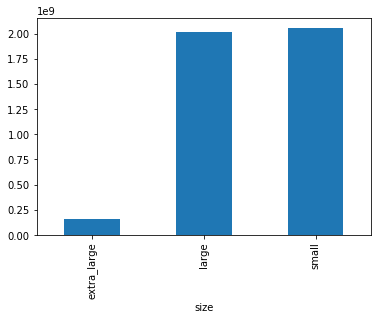

In [29]:
# Import matplotlib.pyplot with alias plt
# import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind = 'bar')

# Show the plot
plt.show()

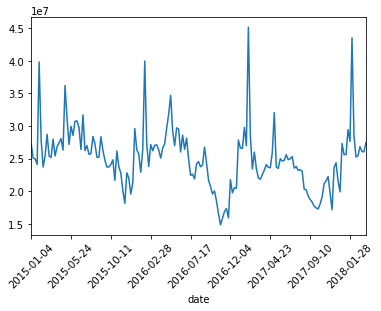

In [31]:
# Import matplotlib.pyplot with alias plt
# import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind = 'line', rot = 45)

# Show the plot
plt.show()

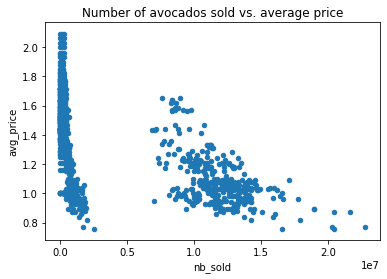

In [32]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x = 'nb_sold', y = 'avg_price', kind = 'scatter', title = 'Number of avocados sold vs. average price')

# Show the plot
plt.show()

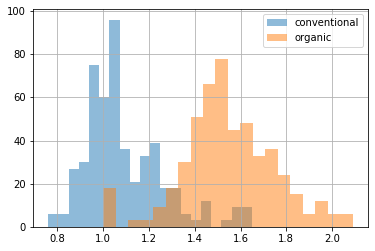

In [33]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins = 20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins = 20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

In [34]:
avocados_2016 = avocados[avocados['year'] == 2016]

       date   type   year  avg_price   size  nb_sold
0     False  False  False      False  False    False
1     False  False  False      False  False    False
2     False  False  False      False  False    False
3     False  False  False      False  False    False
4     False  False  False      False  False    False
...     ...    ...    ...        ...    ...      ...
1009  False  False  False      False  False    False
1010  False  False  False      False  False    False
1011  False  False  False      False  False    False
1012  False  False  False      False  False    False
1013  False  False  False      False  False    False

[1014 rows x 6 columns]
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


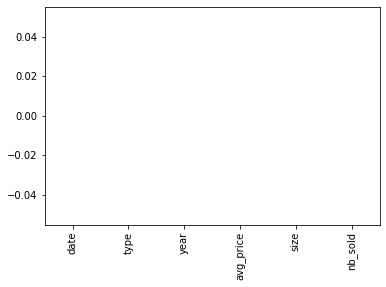

In [36]:
# Import matplotlib.pyplot with alias plt
# import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados.isna())

# Check each column for missing values
print(avocados.isna().any())

# Bar plot of missing values by variable
avocados.isna().sum().plot(kind = 'bar')

# Show plot
plt.show()

In [38]:
# # From previous step
# cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
# avocados_2016[cols_with_missing].hist()
# plt.show()

# # Fill in missing values with 0
# avocados_filled = avocados_2016.fillna(0)

# # Create histograms of the filled columns
# avocados_filled[cols_with_missing].hist()
# # Show the plot
# plt.show()